# Clustering for Crime dataset
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
crime = pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


***
**EDA for Crime Data Set**
***

In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
crime.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [6]:
crime.index = crime.iloc[:,0]
crime.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [7]:
crime = crime.iloc[:,1:5]
crime.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [8]:
# Rename the 'Unnamed: 0' to 'State'
crime.index.name = "State"
crime.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [9]:
# Standardisation function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime.iloc[:,1:])

In [10]:
scaled_crime_df

array([[ 0.79078716, -0.52619514, -0.00345116],
       [ 1.11805959, -1.22406668,  2.50942392],
       [ 1.49381682,  1.00912225,  1.05346626],
       [ 0.23321191, -1.08449238, -0.18679398],
       [ 1.2756352 ,  1.77678094,  2.08881393],
       [ 0.40290872,  0.86954794,  1.88390137],
       [-0.73648418,  0.79976079, -1.09272319],
       [ 0.81502956,  0.45082502, -0.58583422],
       [ 1.99078607,  1.00912225,  1.1505301 ],
       [ 0.48775713, -0.38662083,  0.49265293],
       [-1.51224105,  1.21848371, -0.11129987],
       [-0.61527217, -0.80534376, -0.75839217],
       [ 0.94836277,  1.21848371,  0.29852525],
       [-0.70012057, -0.03768506, -0.0250209 ],
       [-1.39102904, -0.5959823 , -1.07115345],
       [-0.67587817,  0.03210209, -0.34856705],
       [-0.74860538, -0.94491807, -0.53190987],
       [ 0.94836277,  0.03210209,  0.10439756],
       [-1.06375661, -1.01470522, -1.44862395],
       [ 1.56654403,  0.10188925,  0.70835037],
       [-0.26375734,  1.35805802, -0.531

***
**1. Clustering using KMeans for Crime Data set**
***

In [11]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [12]:
kmeans = KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(scaled_crime_df)

In [13]:
predict

array([3, 0, 0, 3, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 1, 3, 1, 0, 2, 0,
       1, 3, 2, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 2, 2,
       1, 2, 2, 1, 1, 1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


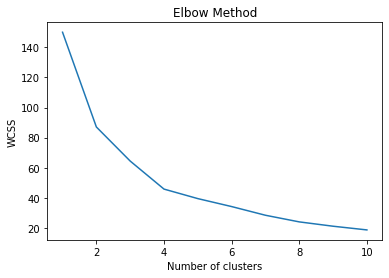

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
#The elbow appear to be smoothening out after four clusters indicating that 
#the optimal number of clusters is 4.
#hence selecting 4 clusters from above scree plot
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4,init = 'k-means++', random_state=42)
clusters_new.fit(scaled_crime_df)

KMeans(n_clusters=4, random_state=42)

In [16]:
clusters_new.labels_

array([0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 3, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 1, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 1, 1,
       3, 1, 1, 3, 3, 1])

In [17]:
#Assign clusters to the data set
crime['crime_cluster'] = clusters_new.labels_

In [18]:
crime

,Murder,Assault,UrbanPop,Rape,crime_cluster
State,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,2


In [19]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.88321132, -0.82279055,  0.01946669],
       [-0.38799965,  0.52061217, -0.21052069],
       [ 1.19960221,  0.74266221,  1.41426923],
       [-1.13648381, -1.09083666, -1.04566193]])

In [20]:
crime.groupby('crime_cluster').agg(['mean']).reset_index()

,crime_cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,5.960000,138.750000,73.000000,19.280000
2,2,10.809091,269.727273,76.181818,34.345455
3,3,3.618182,77.000000,49.909091,11.536364


We can see from above data that in cluster 3 the crime rate is lowest,
In cluster 2 crime rate is highest

**States with lowest Crime rate**

In [21]:
crime[crime['crime_cluster']==3]

,Murder,Assault,UrbanPop,Rape,crime_cluster
State,,,,,
Idaho,2.6,120,54,14.2,3
Iowa,2.2,56,57,11.3,3
Kentucky,9.7,109,52,16.3,3
Maine,2.1,83,51,7.8,3
Montana,6.0,109,53,16.4,3
New Hampshire,2.1,57,56,9.5,3
North Dakota,0.8,45,44,7.3,3
South Dakota,3.8,86,45,12.8,3
Vermont,2.2,48,32,11.2,3


**States with highest Crime rate**


In [22]:
crime[crime['crime_cluster']==2]

,Murder,Assault,UrbanPop,Rape,crime_cluster
State,,,,,
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Florida,15.4,335,80,31.9,2
Illinois,10.4,249,83,24.0,2
Maryland,11.3,300,67,27.8,2
Michigan,12.1,255,74,35.1,2
Nevada,12.2,252,81,46.0,2


***
# 2.Clustering using Hierarchical Clustering(Crime)
***

In [23]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering


In [24]:
crime.iloc[:,0:4]


,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


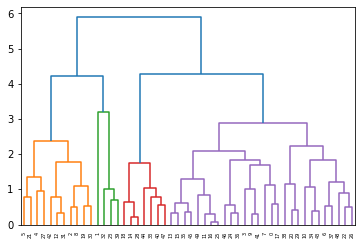

In [25]:
dendogram_crime = sch.dendrogram(sch.linkage(scaled_crime_df,method='complete'),leaf_rotation=90.,  
    leaf_font_size=5)

In [26]:
hc_complete = linkage(crime, "complete")
# hc_average = linkage(c, "average")
# hc_single = linkage(df, "single")

In [27]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [28]:
#Saving Clusters 
clusters_hc = hc.fit_predict(scaled_crime_df)

In [29]:
crime['h_cluster_id'] = clusters_hc

In [30]:
crime

,Murder,Assault,UrbanPop,Rape,crime_cluster,h_cluster_id
State,,,,,,
Alabama,13.2,236,58,21.2,0,1
Alaska,10.0,263,48,44.5,2,3
Arizona,8.1,294,80,31.0,2,1
Arkansas,8.8,190,50,19.5,0,1
California,9.0,276,91,40.6,2,0
Colorado,7.9,204,78,38.7,2,1
Connecticut,3.3,110,77,11.1,1,1
Delaware,5.9,238,72,15.8,1,1
Florida,15.4,335,80,31.9,2,1


In [31]:
crime.groupby('h_cluster_id').mean()

,Murder,Assault,UrbanPop,Rape,crime_cluster
h_cluster_id,,,,,
0,10.600000,264.000000,86.000000,43.30000,2.000000
1,7.671739,167.413043,64.652174,19.78913,1.478261
2,5.300000,46.000000,83.000000,20.20000,1.000000
3,10.000000,263.000000,48.000000,44.50000,2.000000


***
# 3.DBScan (Crime data set)
***

In [32]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [33]:
dbscan_crime = DBSCAN(eps=0.5,min_samples=6)
dbscan_crime.fit(scaled_crime_df)

DBSCAN(min_samples=6)

In [34]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_crime.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[-1 50]]


In [35]:
dbscan_crime = DBSCAN(eps=0.8,min_samples=6)
dbscan_crime.fit(scaled_crime_df)

DBSCAN(eps=0.8, min_samples=6)

In [36]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_crime.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[-1 27]
 [ 0 23]]


In [37]:
dbscan_crime = DBSCAN(eps=1,min_samples=6)
dbscan_crime.fit(scaled_crime_df)

DBSCAN(eps=1, min_samples=6)

In [38]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_crime.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[-1  7]
 [ 0 36]
 [ 1  7]]


In [39]:
dbscan_crime = DBSCAN(eps=1,min_samples=12)
dbscan_crime.fit(scaled_crime_df)

DBSCAN(eps=1, min_samples=12)

In [40]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_crime.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[-1 31]
 [ 0 19]]


In [41]:
dbscan_crime = DBSCAN(eps=1.5,min_samples=10)
dbscan_crime.fit(scaled_crime_df)

DBSCAN(eps=1.5, min_samples=10)

In [42]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_crime.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[-1  2]
 [ 0 48]]


In [43]:
dbscan_crime = DBSCAN(eps=2,min_samples=10)
dbscan_crime.fit(scaled_crime_df)

DBSCAN(eps=2, min_samples=10)

In [44]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_crime.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[-1  1]
 [ 0 49]]


In [45]:
dbscan_crime = DBSCAN(eps=3,min_samples=10)
dbscan_crime.fit(scaled_crime_df)

DBSCAN(eps=3, min_samples=10)

In [46]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_crime.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[ 0 50]]


**Finalizing eps=1 and min_samples=6 as it gives less noise and and create two clusters other than noise**

In [47]:
dbscan_crime = DBSCAN(eps=1,min_samples=6)
dbscan_crime.fit(scaled_crime_df)

DBSCAN(eps=1, min_samples=6)

In [48]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_crime.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[-1  7]
 [ 0 36]
 [ 1  7]]


In [49]:
dbscan_crime.labels_

array([ 0, -1,  1,  0, -1, -1,  0, -1,  1,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  1,  0,  1,  0, -1,  0,  0,  0, -1,  0,  0,  1,  1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [50]:
crime['dbscan_cluster_id'] = dbscan_crime.labels_
crime

,Murder,Assault,UrbanPop,Rape,crime_cluster,h_cluster_id,dbscan_cluster_id
State,,,,,,,
Alabama,13.2,236,58,21.2,0,1,0
Alaska,10.0,263,48,44.5,2,3,-1
Arizona,8.1,294,80,31.0,2,1,1
Arkansas,8.8,190,50,19.5,0,1,0
California,9.0,276,91,40.6,2,0,-1
Colorado,7.9,204,78,38.7,2,1,-1
Connecticut,3.3,110,77,11.1,1,1,0
Delaware,5.9,238,72,15.8,1,1,-1
Florida,15.4,335,80,31.9,2,1,1


In [51]:
#Finding clusters
crime['dbscan_cluster_id'].value_counts()

 0    36
-1     7
 1     7
Name: dbscan_cluster_id, dtype: int64

In [52]:
#Finding outliers in given dataset 
crime[crime['dbscan_cluster_id']==-1]

,Murder,Assault,UrbanPop,Rape,crime_cluster,h_cluster_id,dbscan_cluster_id
State,,,,,,,
Alaska,10.0,263,48,44.5,2,3,-1
California,9.0,276,91,40.6,2,0,-1
Colorado,7.9,204,78,38.7,2,1,-1
Delaware,5.9,238,72,15.8,1,1,-1
Mississippi,16.1,259,44,17.1,0,1,-1
Nevada,12.2,252,81,46.0,2,0,-1
North Carolina,13.0,337,45,16.1,0,1,-1


In [53]:
#Finding outliers in given dataset 
crime[crime['dbscan_cluster_id']==0]

,Murder,Assault,UrbanPop,Rape,crime_cluster,h_cluster_id,dbscan_cluster_id
State,,,,,,,
Alabama,13.2,236,58,21.2,0,1,0
Arkansas,8.8,190,50,19.5,0,1,0
Connecticut,3.3,110,77,11.1,1,1,0
Georgia,17.4,211,60,25.8,0,1,0
Hawaii,5.3,46,83,20.2,1,2,0
Idaho,2.6,120,54,14.2,3,1,0
Indiana,7.2,113,65,21.0,1,1,0
Iowa,2.2,56,57,11.3,3,1,0
Kansas,6.0,115,66,18.0,1,1,0


In [54]:
#Finding outliers in given dataset 
crime[crime['dbscan_cluster_id']==1]

,Murder,Assault,UrbanPop,Rape,crime_cluster,h_cluster_id,dbscan_cluster_id
State,,,,,,,
Arizona,8.1,294,80,31.0,2,1,1
Florida,15.4,335,80,31.9,2,1,1
Illinois,10.4,249,83,24.0,2,1,1
Maryland,11.3,300,67,27.8,2,1,1
Michigan,12.1,255,74,35.1,2,1,1
New Mexico,11.4,285,70,32.1,2,1,1
New York,11.1,254,86,26.1,2,1,1


In [55]:
#To find percentage of noisy points
(len(crime[crime['dbscan_cluster_id']==-1])/len(crime))*100

14.000000000000002

In [56]:
X = metrics.silhouette_score(scaled_crime_df,dbscan_crime.labels_)
X

0.2426555086703038

***
# Clustering for East West Airlines
***Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.***
***

In [57]:
airline_df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [58]:
airline_df.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


***
**EDA(EastWest Airlines)**
***

In [59]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [60]:
airline_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [61]:
airline_df.rename({'ID#':'id','Balance':'balance','Qual_miles':'qual_miles',
                       'Bonus_miles':'bonus_miles',
                           'Bonus_trans':'bonus_trans','Flight_miles_12mo':'flight_miles_12mo',
                               'Flight_trans_12':'flight_trans_12','Days_since_enroll':'days_since_enroll',
                                   'Award?':'award'},axis=1, inplace=True)
airline_df.head()

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [62]:
airline_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


***
***Data Visualization for East West dataset***
***

In [63]:
airline_df['qual_miles'].value_counts()

0       3773
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: qual_miles, Length: 164, dtype: int64

In [64]:
airline_df['flight_miles_12mo'].value_counts()

0        2723
500       195
1000       53
150        51
100        49
         ... 
12400       1
2729        1
4309        1
683         1
79          1
Name: flight_miles_12mo, Length: 343, dtype: int64

In [65]:
airline_df[airline_df['flight_miles_12mo']==12400]

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
1529,1544,57857,1099,1,1,1,62650,37,12400,29,4996,1


In [66]:
airline_df['flight_trans_12'].value_counts()

0     2723
1      469
2      242
3      132
4       97
5       58
6       43
9       32
8       31
7       30
11      19
12      16
10      16
16      11
15       9
18       8
17       8
23       7
14       7
13       7
29       5
26       5
28       4
20       4
24       4
53       2
19       2
36       1
45       1
27       1
31       1
21       1
25       1
22       1
46       1
Name: flight_trans_12, dtype: int64

In [67]:
airline_df['award'].value_counts()

0    2518
1    1481
Name: award, dtype: int64

In [68]:
airline_df.columns.get_loc('award')

11

In [69]:
airline_df['balance'].value_counts()

1000     10
500       5
2000      5
1500      4
5000      3
         ..
9554      1
30130     1
12665     1
9860      1
3016      1
Name: balance, Length: 3904, dtype: int64

<AxesSubplot:xlabel='balance', ylabel='Count'>

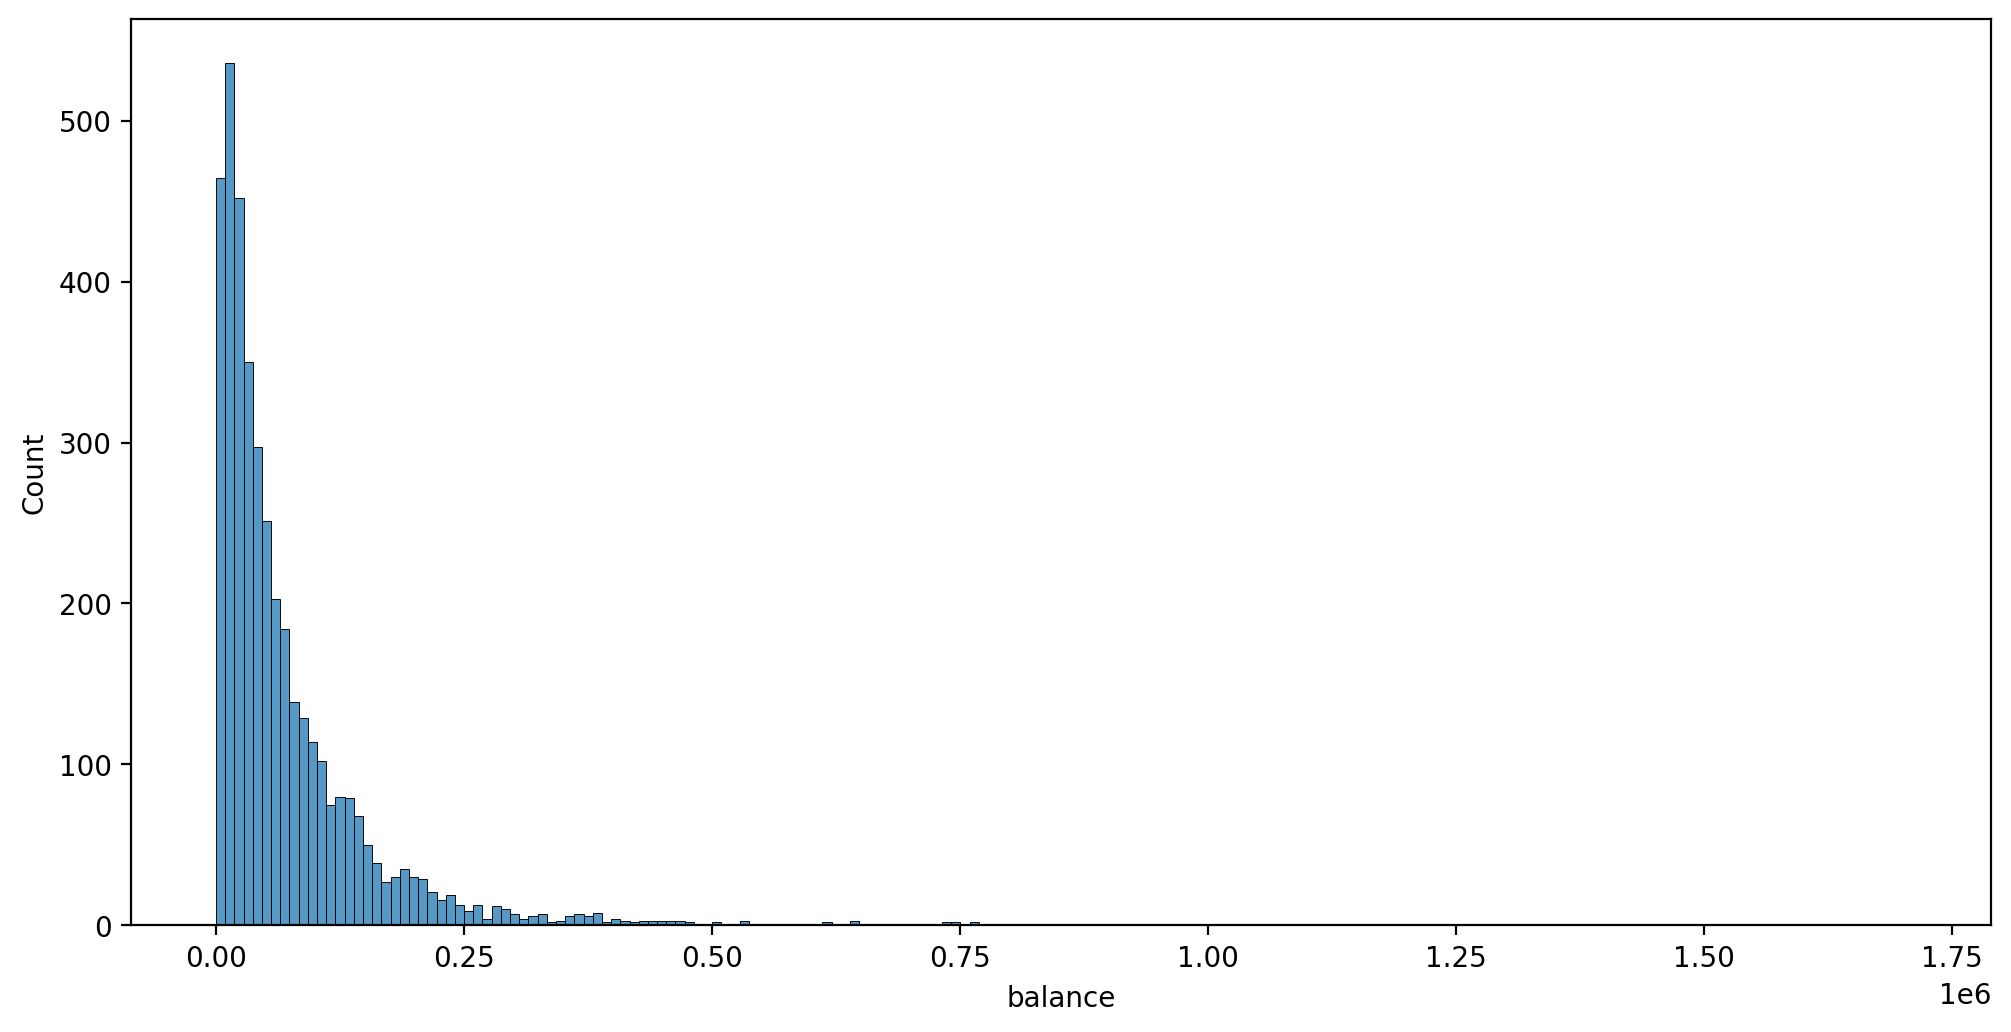

In [70]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=airline_df,x='balance')

In [71]:
airline_df['qual_miles'].value_counts()

0       3773
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: qual_miles, Length: 164, dtype: int64

<AxesSubplot:xlabel='qual_miles', ylabel='Count'>

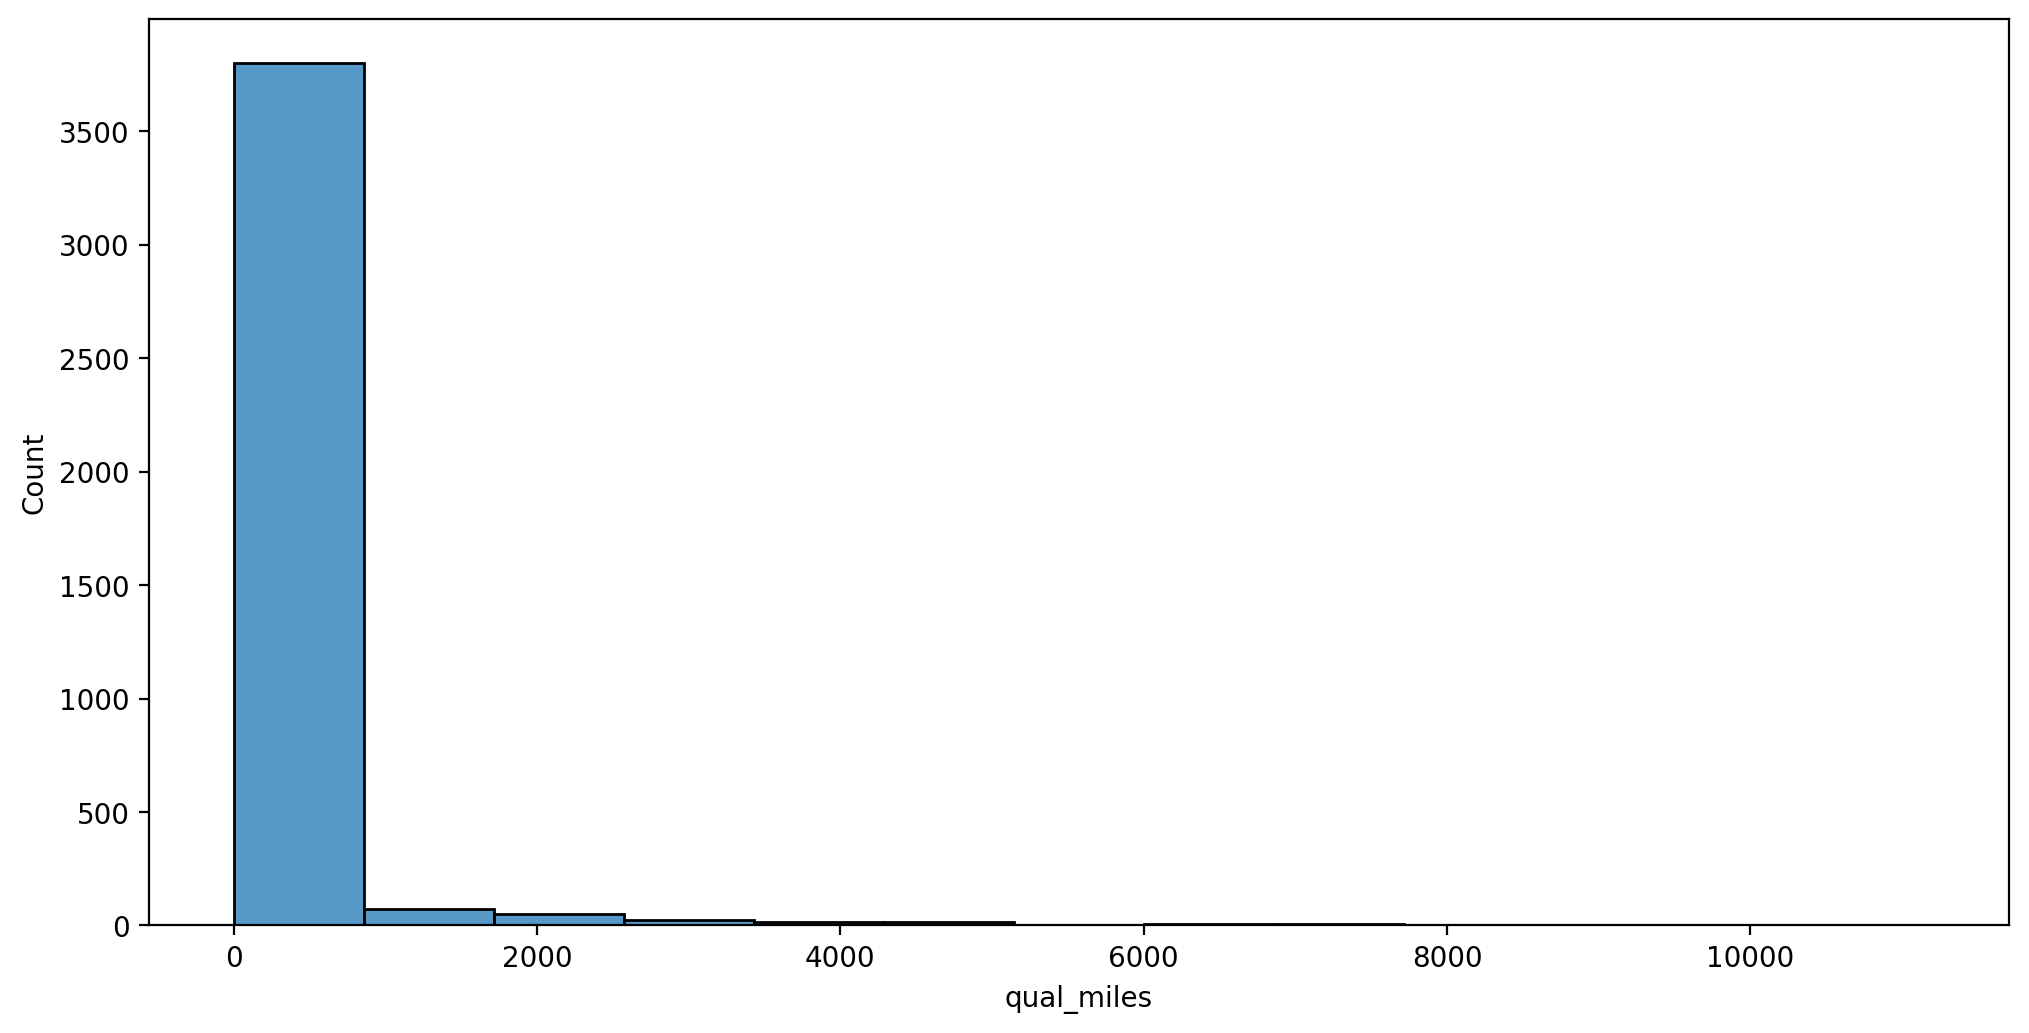

In [72]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=airline_df,x='qual_miles')

In [73]:
airline_df['cc1_miles'].value_counts()

1    2289
3     613
4     525
5     288
2     284
Name: cc1_miles, dtype: int64

<AxesSubplot:xlabel='cc1_miles', ylabel='Count'>

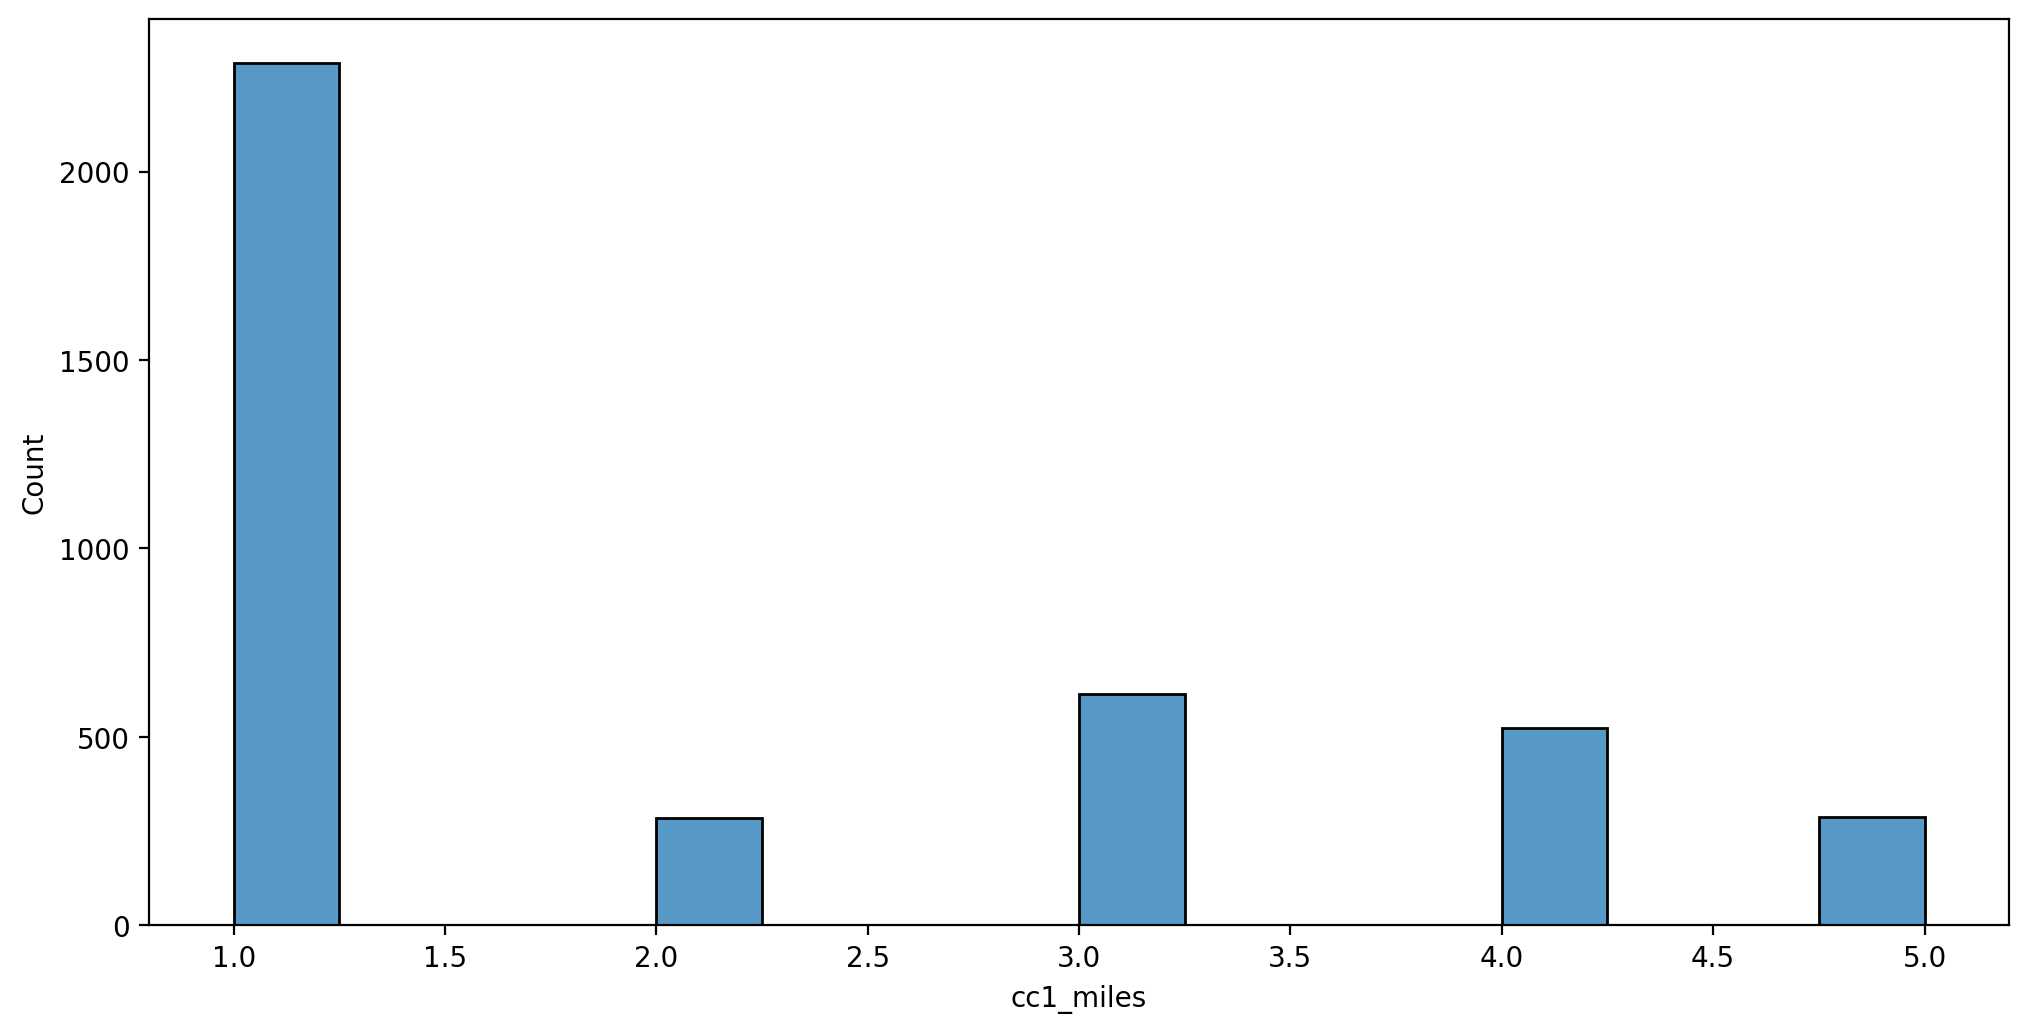

In [74]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=airline_df,x='cc1_miles')

In [75]:
airline_df['cc2_miles'].value_counts()

1    3956
2      28
3      15
Name: cc2_miles, dtype: int64

<AxesSubplot:xlabel='cc2_miles', ylabel='Count'>

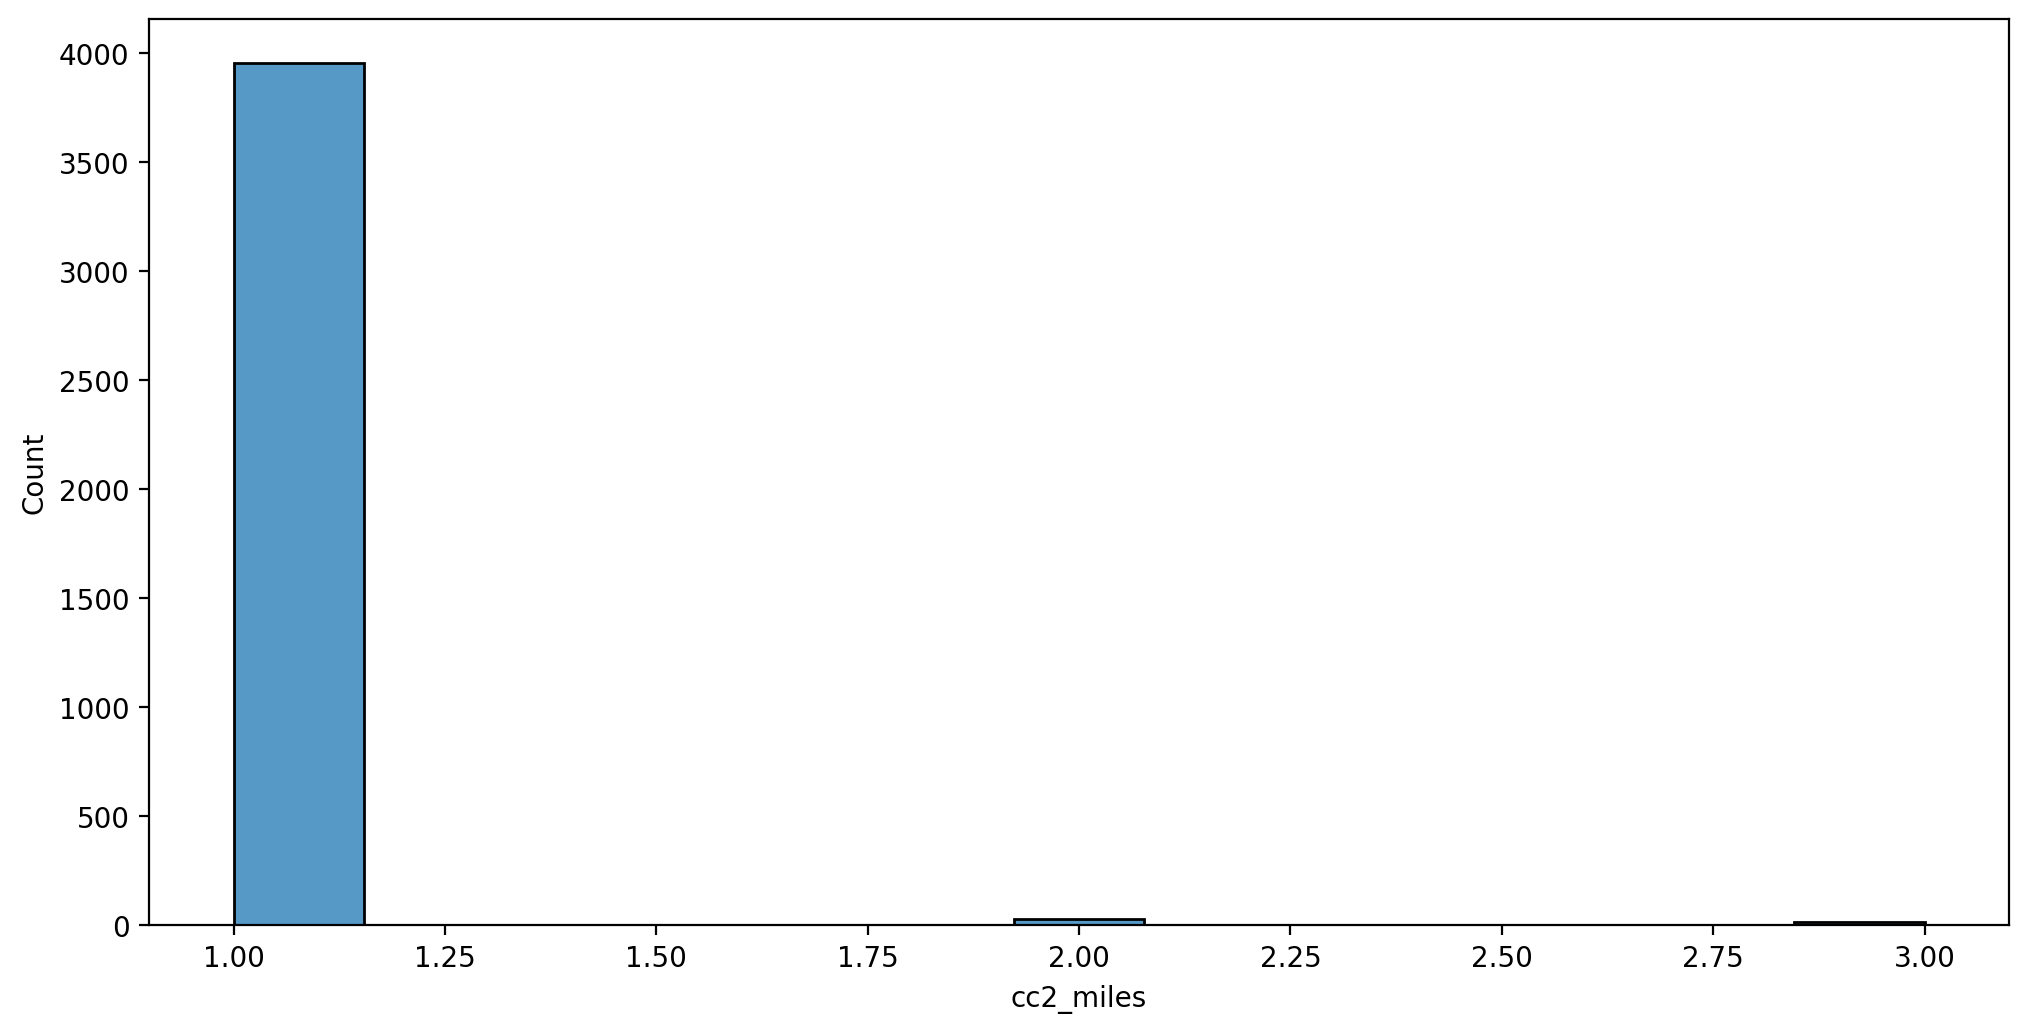

In [76]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=airline_df,x='cc2_miles')

In [77]:
airline_df['cc3_miles'].value_counts()

1    3981
4       6
5       5
3       4
2       3
Name: cc3_miles, dtype: int64

<AxesSubplot:xlabel='cc3_miles', ylabel='Count'>

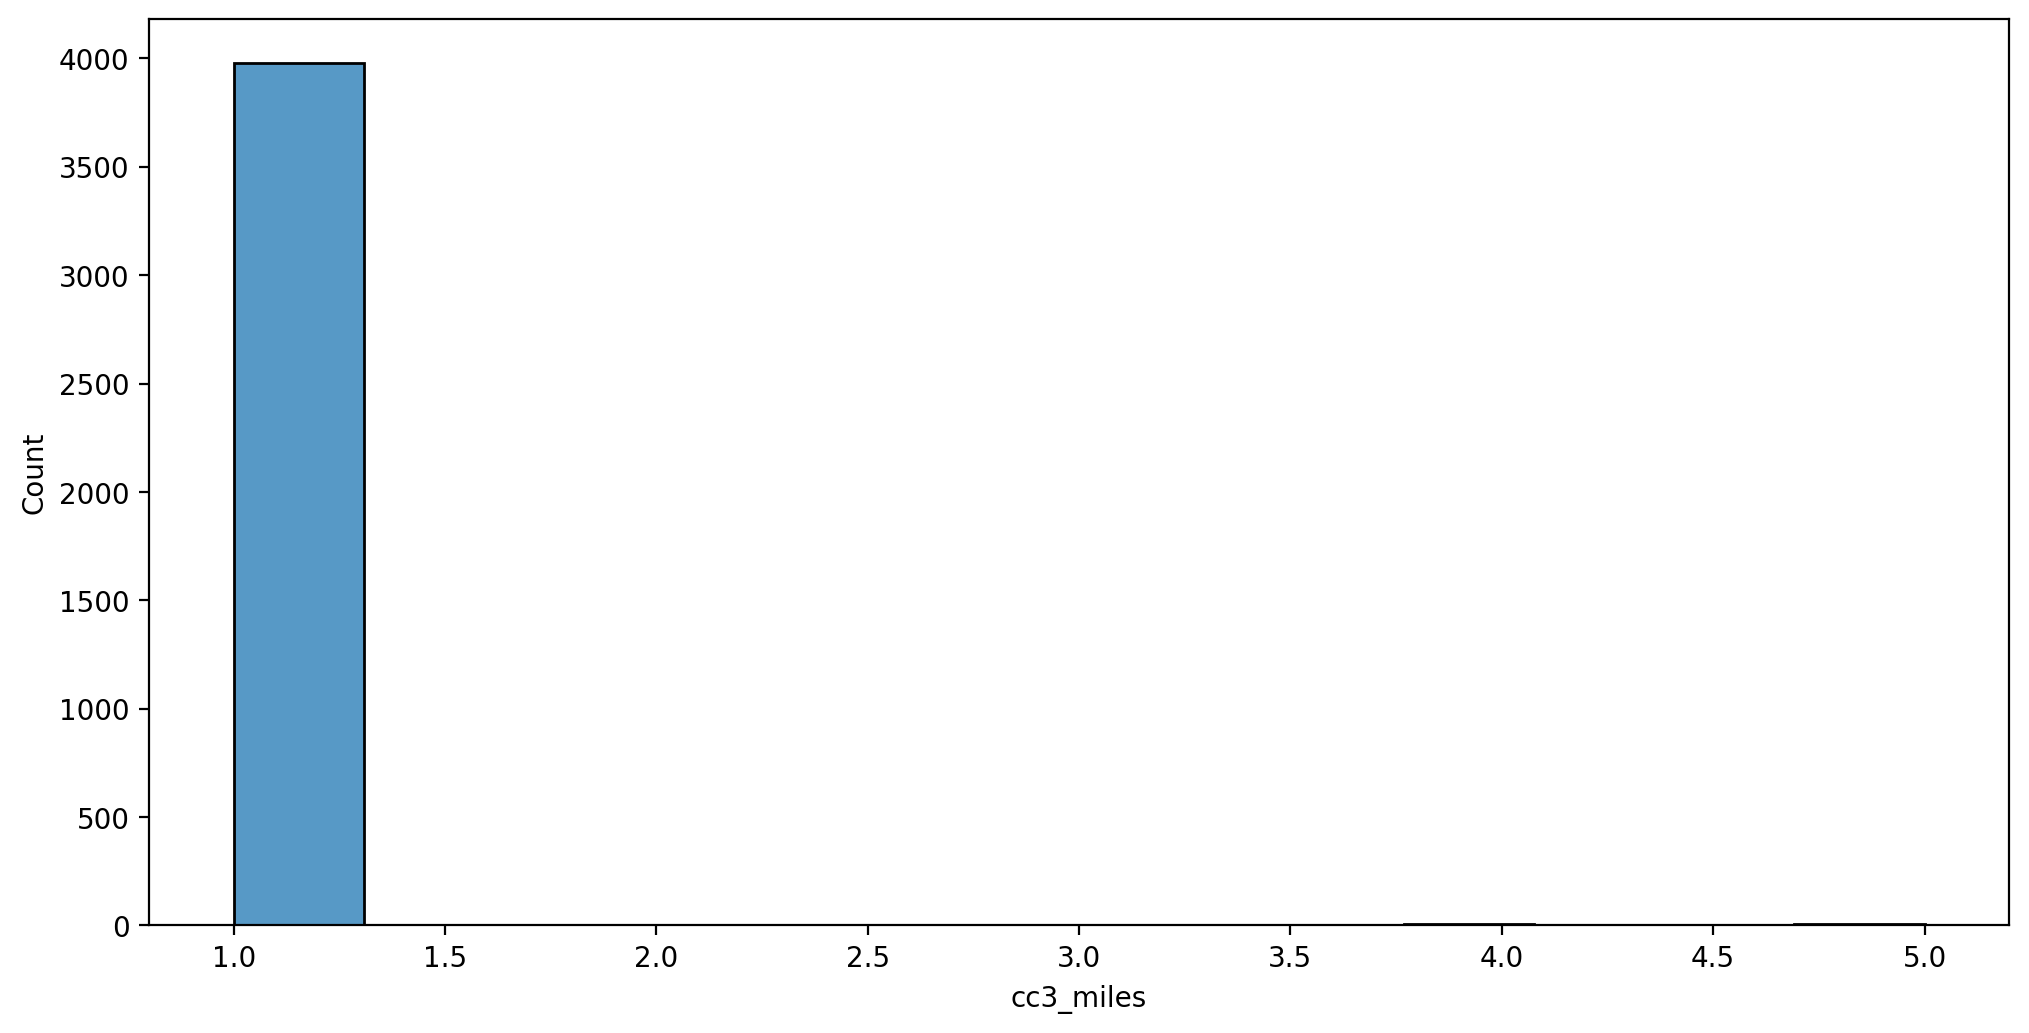

In [78]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=airline_df,x='cc3_miles')

In [79]:
airline_df['bonus_miles'].value_counts()

0        475
500       66
1000      42
100       27
1500      25
        ... 
11981      1
28904      1
9850       1
52449      1
25447      1
Name: bonus_miles, Length: 2734, dtype: int64

<AxesSubplot:xlabel='bonus_miles', ylabel='Count'>

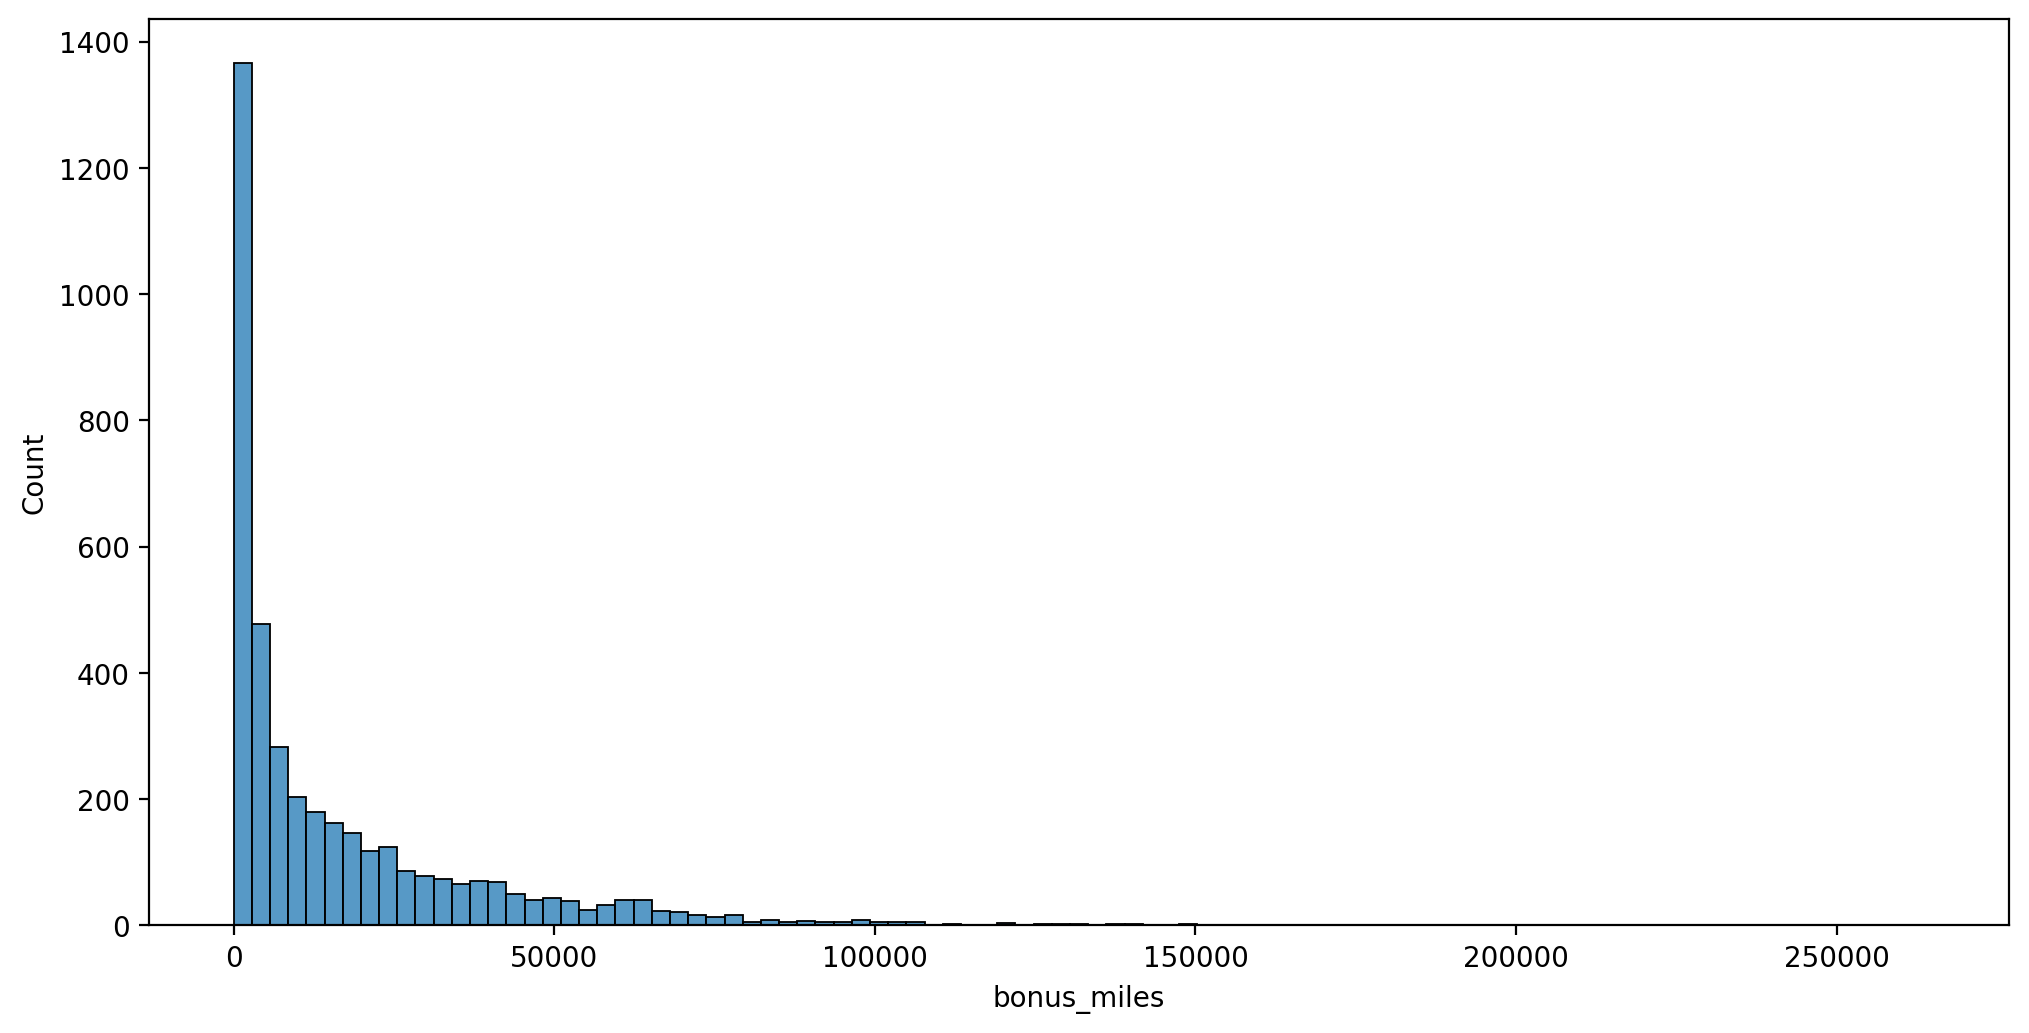

In [80]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=airline_df,x='bonus_miles')

In [81]:
airline_df['bonus_trans'].value_counts()

0     475
14    262
3     250
13    231
15    212
1     212
4     190
16    189
12    148
17    140
5     126
18    125
6     115
11    108
2     104
8     100
10     97
19     97
9      91
7      88
20     85
21     69
22     63
24     41
26     41
23     35
25     34
27     32
28     28
32     26
29     23
31     21
30     17
34     15
39     12
35     11
37     11
38     10
33      8
41      7
43      7
36      6
45      5
40      4
53      4
51      4
44      3
50      3
47      3
46      2
65      2
49      2
55      1
52      1
58      1
86      1
68      1
Name: bonus_trans, dtype: int64

<AxesSubplot:xlabel='bonus_trans', ylabel='Count'>

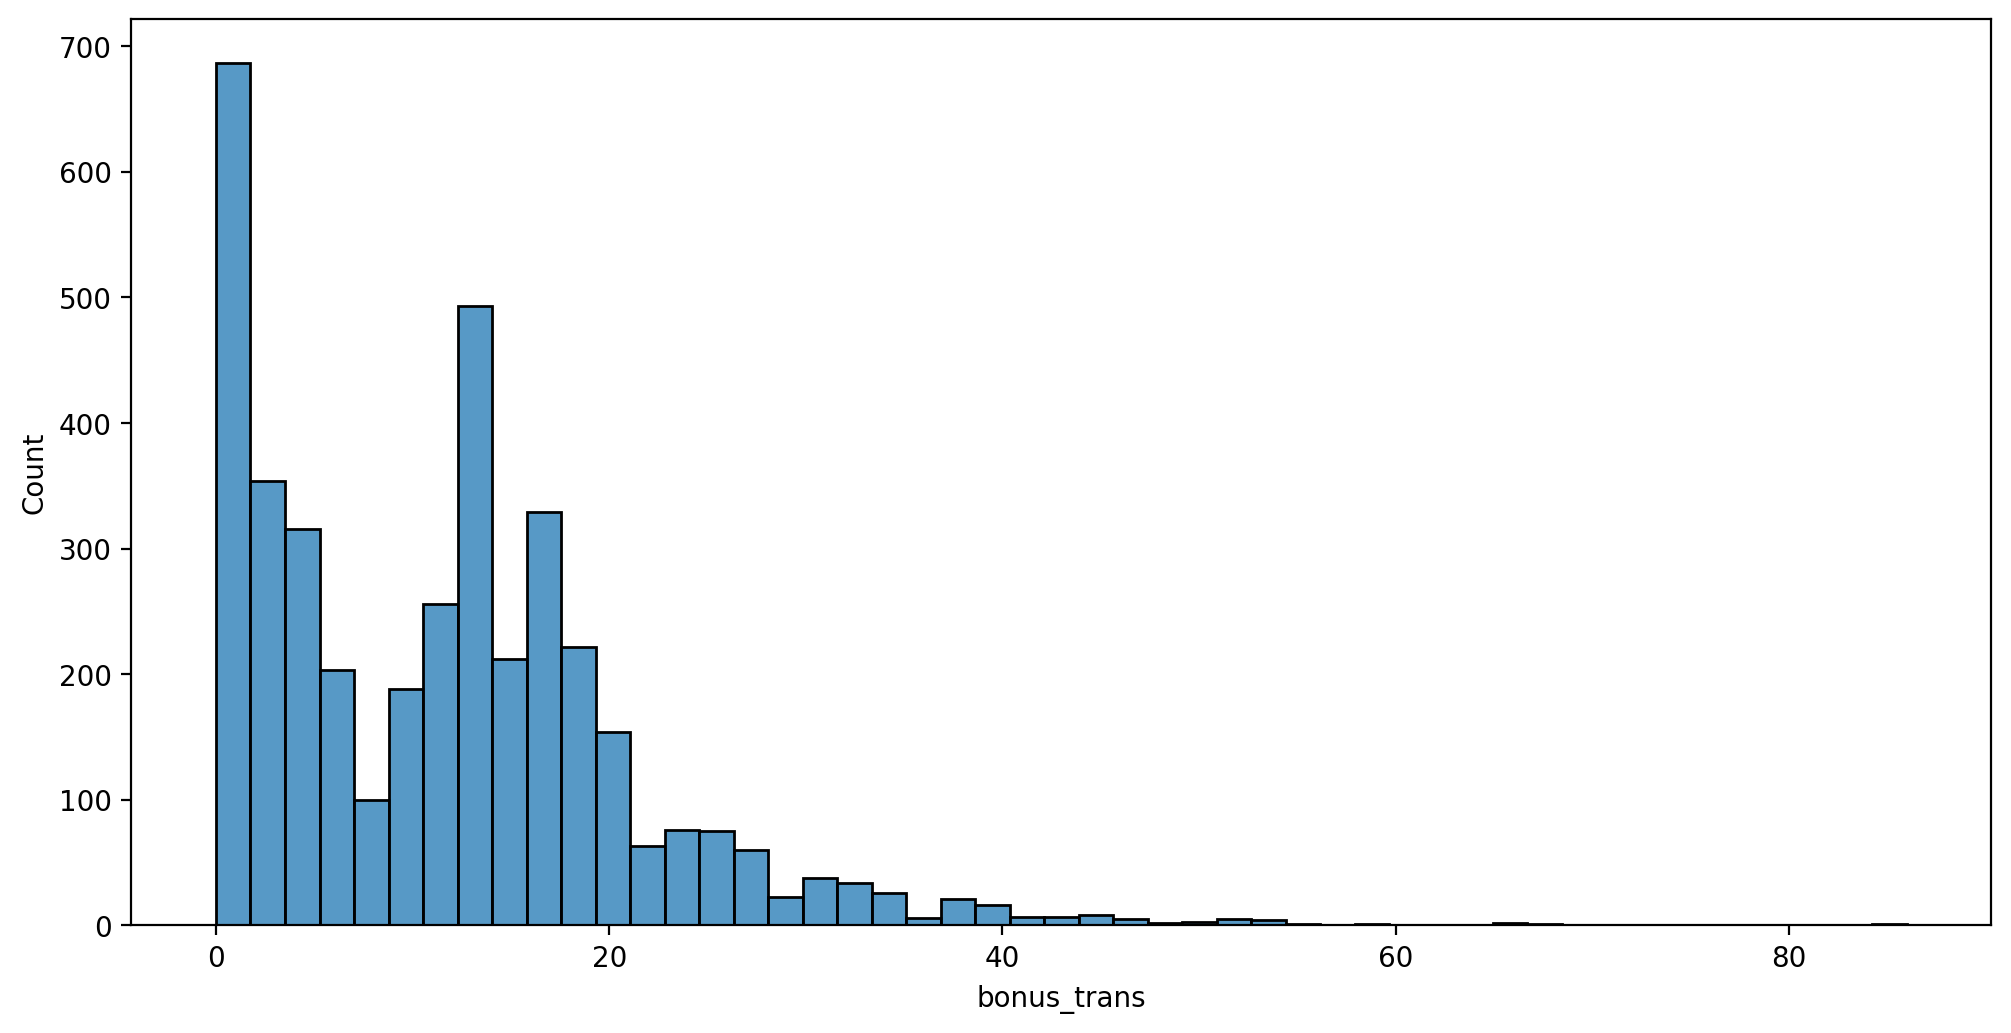

In [82]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=airline_df,x='bonus_trans')


In [83]:
airline_df['flight_miles_12mo'].value_counts()

0        2723
500       195
1000       53
150        51
100        49
         ... 
12400       1
2729        1
4309        1
683         1
79          1
Name: flight_miles_12mo, Length: 343, dtype: int64

<AxesSubplot:xlabel='flight_miles_12mo', ylabel='Count'>

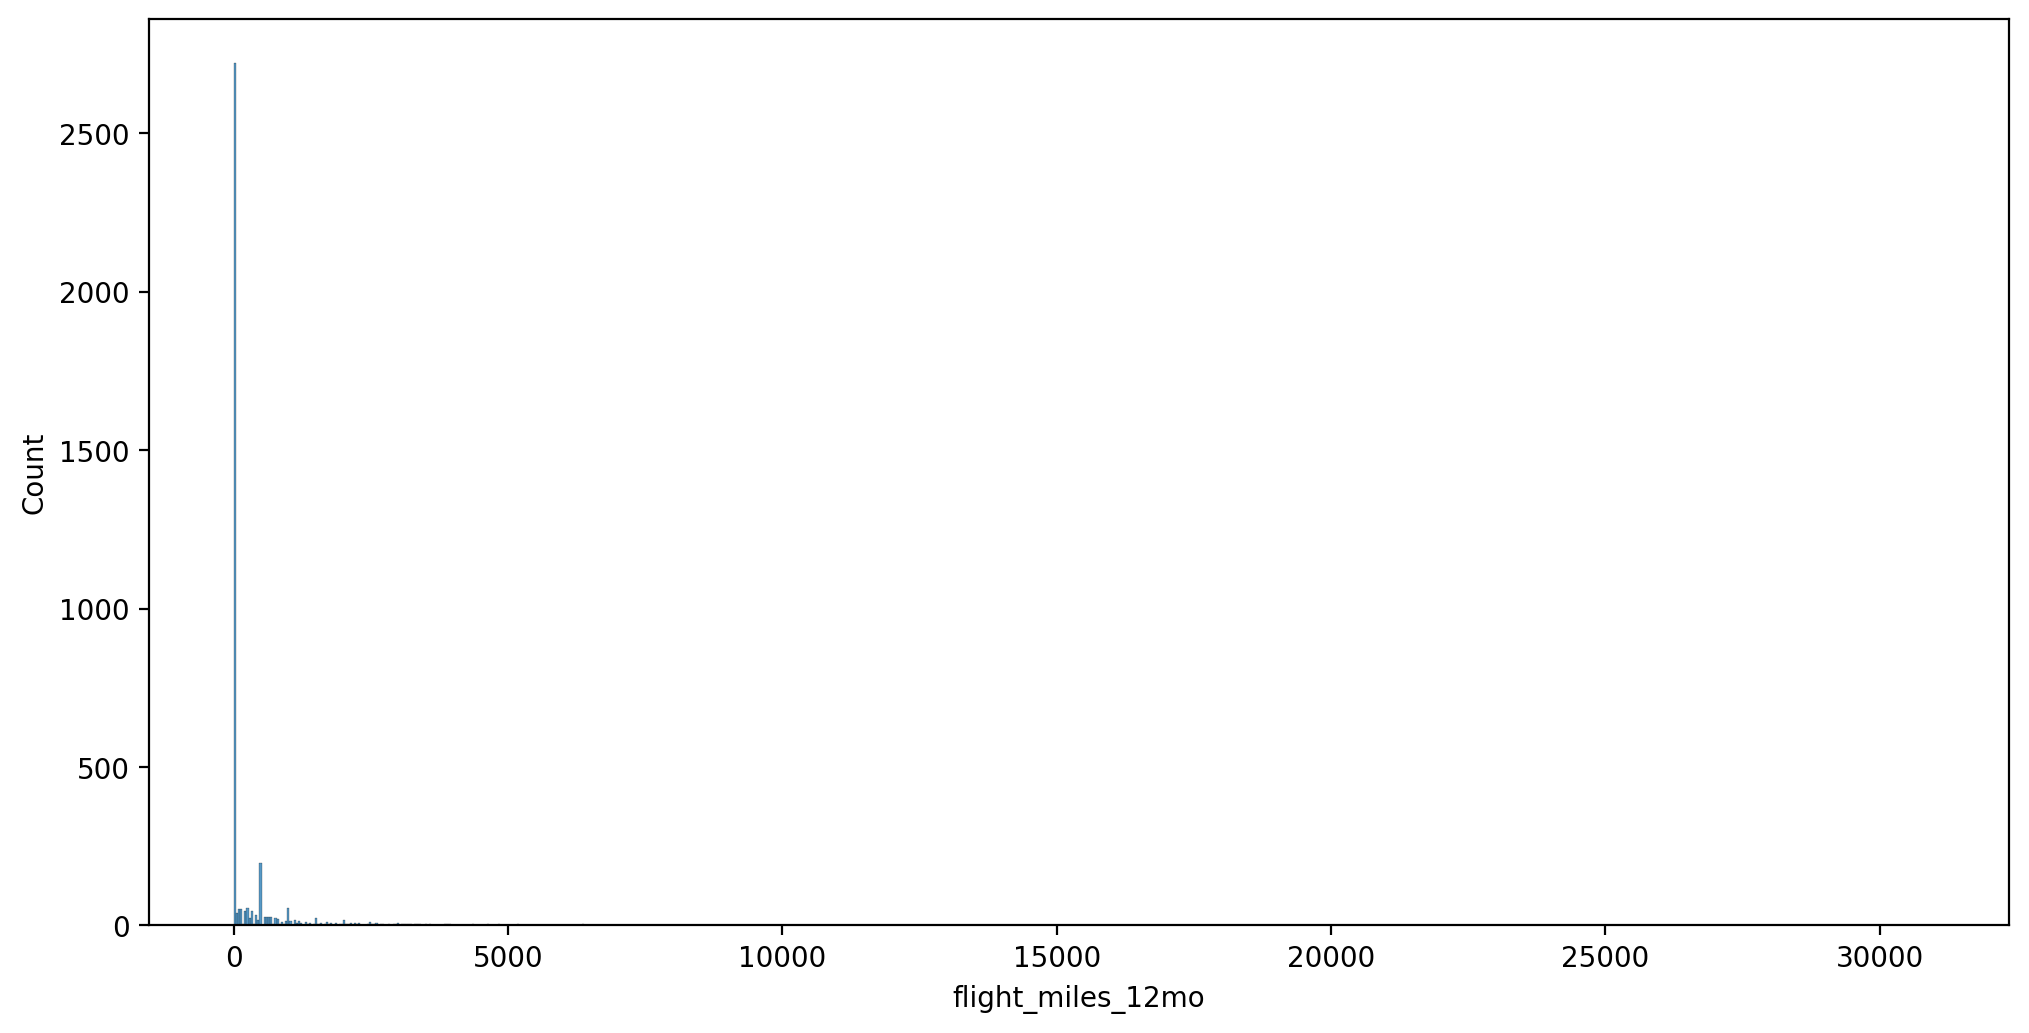

In [84]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=airline_df,x='flight_miles_12mo')

In [85]:
airline_df['flight_trans_12'].value_counts()

0     2723
1      469
2      242
3      132
4       97
5       58
6       43
9       32
8       31
7       30
11      19
12      16
10      16
16      11
15       9
18       8
17       8
23       7
14       7
13       7
29       5
26       5
28       4
20       4
24       4
53       2
19       2
36       1
45       1
27       1
31       1
21       1
25       1
22       1
46       1
Name: flight_trans_12, dtype: int64

<AxesSubplot:xlabel='flight_trans_12', ylabel='Count'>

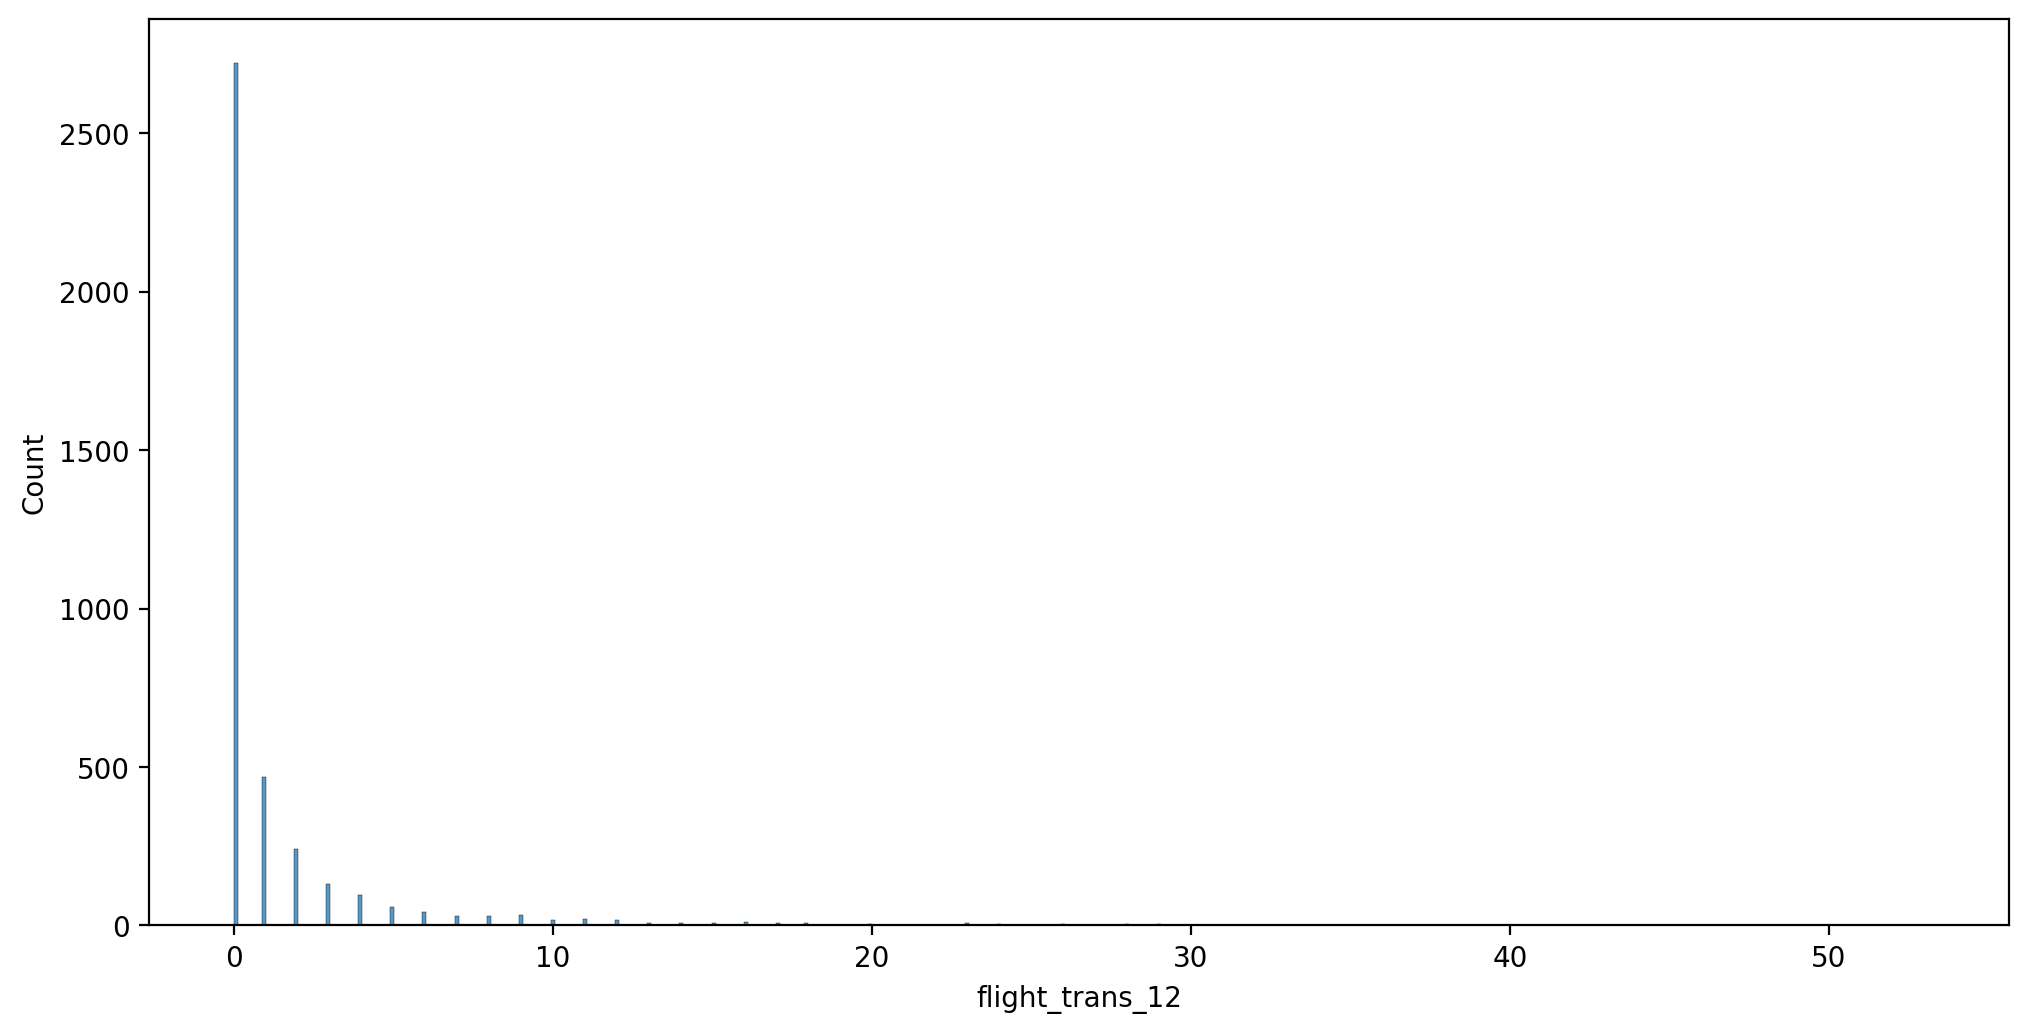

In [86]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=airline_df,x='flight_trans_12')

In [87]:
airline_df['days_since_enroll'].value_counts()

8296    38
8289    33
8228    15
7467     7
1597     7
        ..
4770     1
4672     1
4615     1
4566     1
1398     1
Name: days_since_enroll, Length: 2820, dtype: int64

<AxesSubplot:xlabel='days_since_enroll', ylabel='Count'>

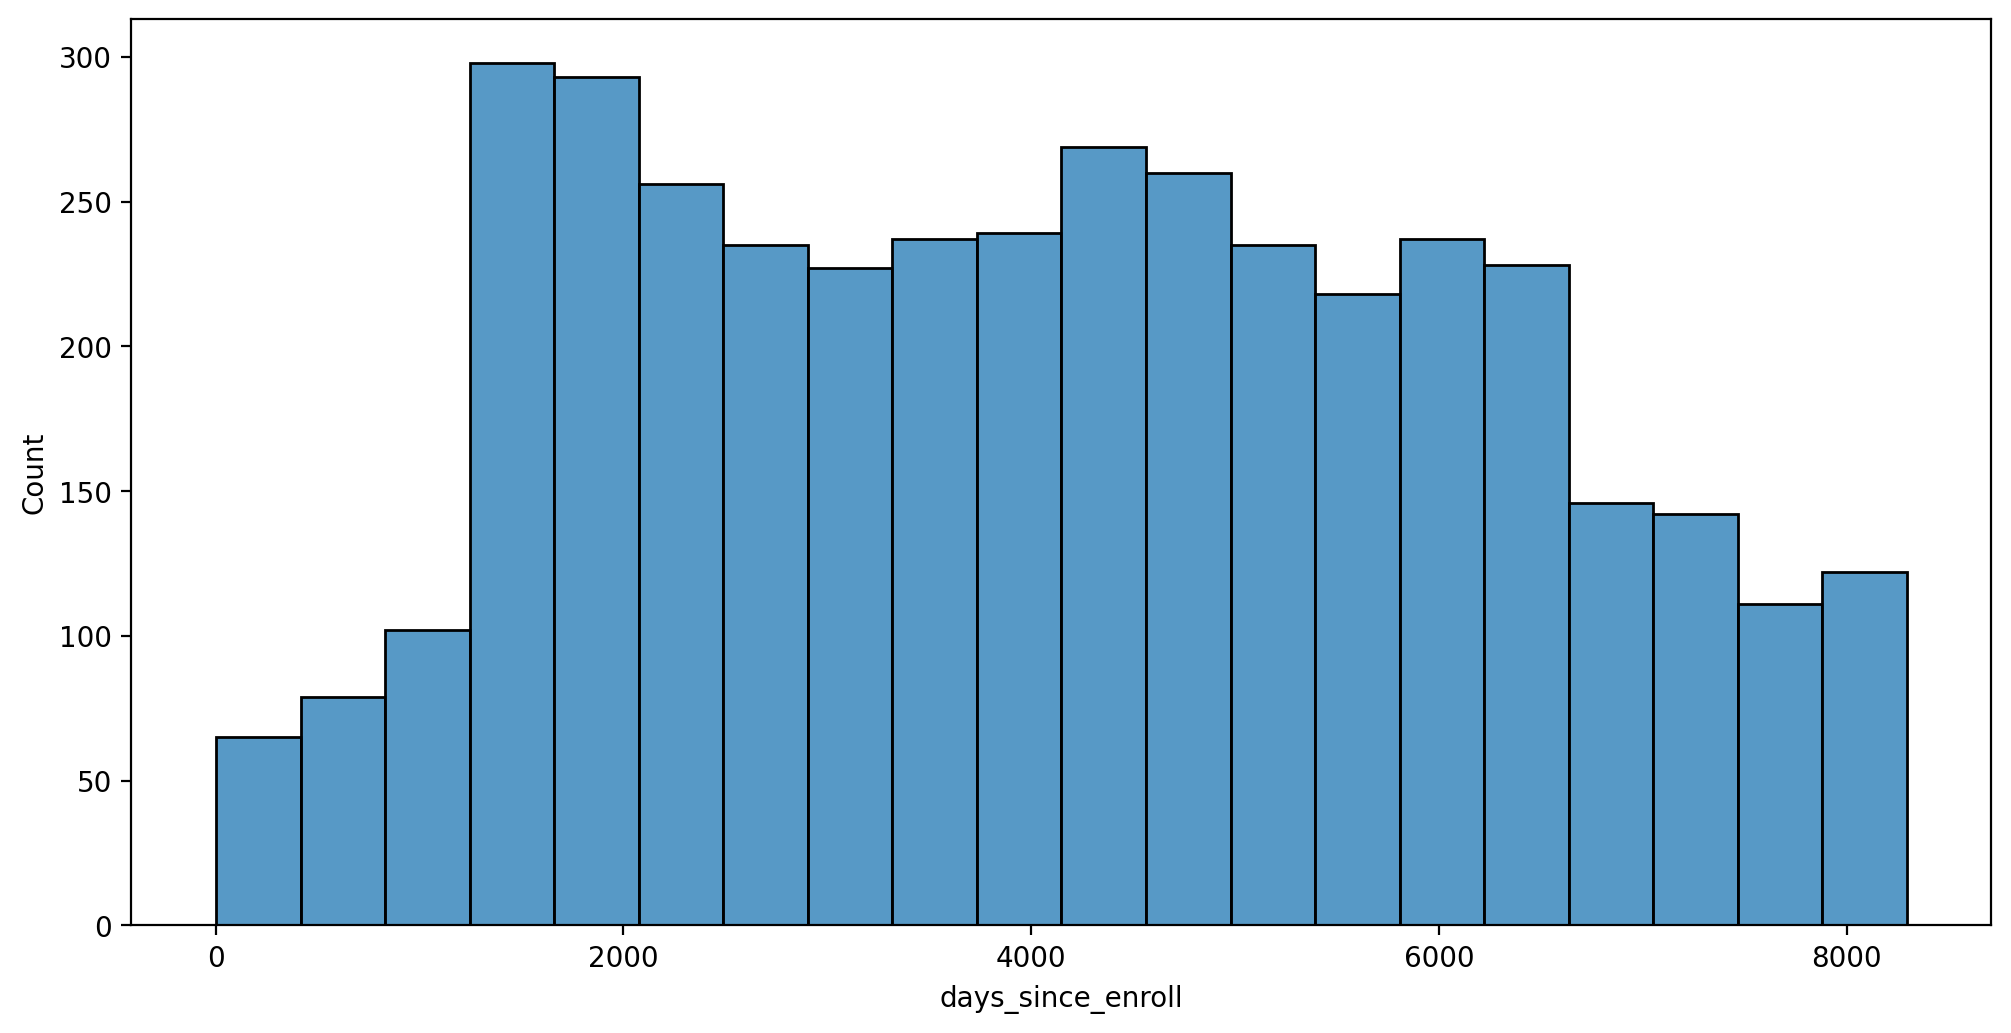

In [88]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=airline_df,x='days_since_enroll')

In [89]:
airline_df.columns

Index(['id', 'balance', 'qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'bonus_miles', 'bonus_trans', 'flight_miles_12mo', 'flight_trans_12',
       'days_since_enroll', 'award'],
      dtype='object')

In [90]:
airline_df_new = airline_df.drop(['id','award'],
                               axis=1 )

In [91]:
airline_df_new.columns

Index(['balance', 'qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'bonus_miles', 'bonus_trans', 'flight_miles_12mo', 'flight_trans_12',
       'days_since_enroll'],
      dtype='object')

In [92]:
#Normalizing data set excluding ID and award(as it only contains 0 and 1 value)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline_df = scaler.fit_transform(airline_df_new.iloc[:,:])

In [93]:
scaled_airline_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [94]:
scaled_airline_df.shape

(3999, 10)

*** 
# KMean-Clustering for East West Airlines
***

In [95]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia,
#or within-cluster sum-of-squares criterion:

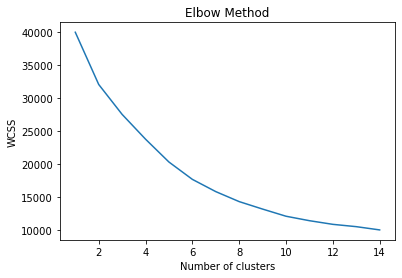

In [96]:
#WCSS (Within Cluster Sum of Squares)
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_airline_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [97]:
#From ELbow method number of clusters are not clearly predictable

# We will also use the Silhouette score to determine an optimal number.
from sklearn.metrics import silhouette_score
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(scaled_airline_df)
    sil_score1= silhouette_score(scaled_airline_df,cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.35826638416515033
For n_clusters = 3 The average silhouette_score is : 0.330411996315242
For n_clusters = 4 The average silhouette_score is : 0.3322237914091003
For n_clusters = 5 The average silhouette_score is : 0.34818137095348617
For n_clusters = 6 The average silhouette_score is : 0.35990130799241493
For n_clusters = 7 The average silhouette_score is : 0.2590199600553473
For n_clusters = 8 The average silhouette_score is : 0.26819091939498757
For n_clusters = 9 The average silhouette_score is : 0.2821304457163712


In [98]:
#Best Silhouette score is for clusters = 6 

clusters_airlines = KMeans(n_clusters=6,random_state=0)
clusters_airlines.fit(scaled_airline_df)

KMeans(n_clusters=6, random_state=0)

In [99]:
clusters_airlines.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
airline_df['kmean_cluster_id'] = clusters_airlines.labels_

In [101]:
airline_df.head(20)

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award,kmean_cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,1
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,5
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1


In [102]:
airline_df[airline_df['kmean_cluster_id']==0]

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award,kmean_cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [103]:
np.max((airline_df[airline_df['kmean_cluster_id']==0]))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


id                     4021
balance              518960
qual_miles             2788
cc1_miles                 3
cc2_miles                 1
cc3_miles                 2
bonus_miles           40256
bonus_trans              39
flight_miles_12mo      6251
flight_trans_12          11
days_since_enroll      8296
award                     1
kmean_cluster_id          0
dtype: int64

In [104]:
np.min((airline_df[airline_df['kmean_cluster_id']==0]))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


id                   1
balance              0
qual_miles           0
cc1_miles            1
cc2_miles            1
cc3_miles            1
bonus_miles          0
bonus_trans          0
flight_miles_12mo    0
flight_trans_12      0
days_since_enroll    2
award                0
kmean_cluster_id     0
dtype: int64

In [105]:
airline_df[airline_df['kmean_cluster_id']==1]

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award,kmean_cluster_id
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1
12,13,43382,0,2,1,1,11150,20,0,0,6924,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,1
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,1
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,1
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,1


In [106]:
np.max(airline_df[airline_df['kmean_cluster_id']==1])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


id                      4014
balance              1125076
qual_miles              2880
cc1_miles                  5
cc2_miles                  1
cc3_miles                  2
bonus_miles           263685
bonus_trans               53
flight_miles_12mo       4130
flight_trans_12           11
days_since_enroll       8296
award                      1
kmean_cluster_id           1
dtype: int64

In [107]:
airline_df[airline_df['kmean_cluster_id']==2].mean()

id                     2110.423729
balance              117326.186441
qual_miles             5445.305085
cc1_miles                 2.033898
cc2_miles                 1.000000
cc3_miles                 1.000000
bonus_miles           19059.610169
bonus_trans              12.305085
flight_miles_12mo       965.796610
flight_trans_12           2.881356
days_since_enroll      3874.830508
award                     0.542373
kmean_cluster_id          2.000000
dtype: float64

In [108]:
np.max(airline_df[airline_df['kmean_cluster_id']==2])

id                     3920
balance              529886
qual_miles            11148
cc1_miles                 5
cc2_miles                 1
cc3_miles                 1
bonus_miles          104159
bonus_trans              33
flight_miles_12mo      7741
flight_trans_12          15
days_since_enroll      8296
award                     1
kmean_cluster_id          2
dtype: int64

In [109]:
kmeans.cluster_centers_

array([[-4.21493993e-01, -1.31082130e-01, -7.60059709e-01,
        -9.82418871e-02, -6.27665798e-02, -6.12613599e-01,
        -8.18628839e-01, -2.49736371e-01, -2.60104177e-01,
        -1.00542171e+00],
       [ 1.50674550e-01, -1.42812271e-01,  6.02587715e-01,
        -9.82418871e-02, -6.27665798e-02,  8.94035737e-02,
         4.77550690e-01, -2.13577122e-01, -2.36238538e-01,
         1.06730879e+00],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01],
       [ 7.09311068e-01,  1.79334905e-01,  3.90032656e-01,
        -9.82418871e-02, -6.27665798e-02,  8.14426664e-01,
         2.11874366e+00,  3.90158196e+00,  4.54106741e+00,
         4.51155816e-01],
       [-2.12080962e-01, -1.00117838e-01, -7.69578406e-01,
         1.34489756e+01, -6.27665798e-02,  1.35233870e-01,
         7.63483392e-01,  1.66146599e-01,  4.81558654e-01,
        -2.

In [110]:
clusters_airlines.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 10,
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

In [111]:
airline_df.groupby('kmean_cluster_id').agg(['mean'])

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
kmean_cluster_id,,,,,,,,,,,,
0,2236.231343,42451.821310,48.121891,1.164179,1.000000,1.000415,4149.015755,6.503731,210.793532,0.644279,3700.146766,0.237977
1,1633.313017,115503.626787,52.938299,3.677953,1.000000,1.001505,38151.508653,18.708051,321.757713,0.971407,4827.926260,0.557562
2,2110.423729,117326.186441,5445.305085,2.033898,1.000000,1.000000,19059.610169,12.305085,965.796610,2.881356,3874.830508,0.542373
3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,1742.758865,187792.460993,471.163121,2.262411,1.000000,1.000000,33236.602837,27.978723,5773.602837,16.730496,4684.851064,0.773050
5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


***

# 2.Clustering using Hierarchical Clustering(East West Airline)

***

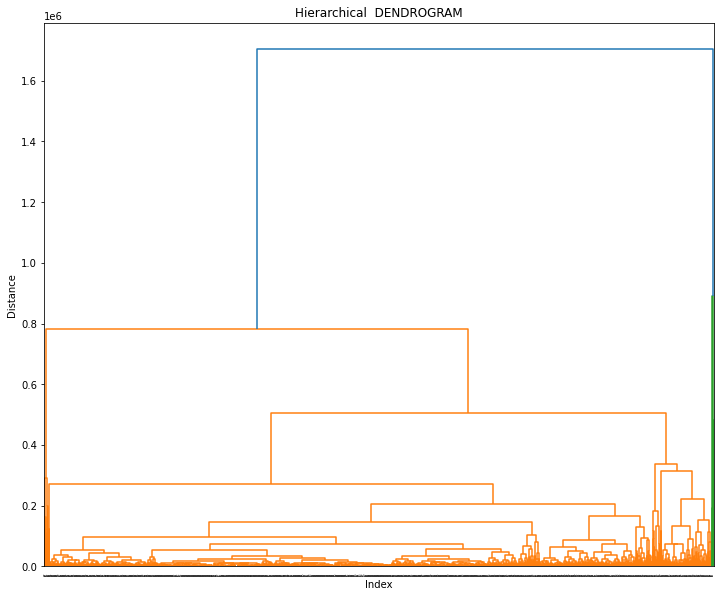

In [112]:
# create dendrogram
plt.figure(figsize=(12,10));
plt.title('Hierarchical  DENDROGRAM');
plt.xlabel('Index');
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(airline_df_new,method='complete'),leaf_font_size=0.1
                           ,labels=airline_df_new.index)
#methods : 'single','complete','centroid','average'
plt.show()

In [113]:
# creating clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=3)

In [114]:
# save clusters for chart
y_hc = hc.fit_predict(airline_df_new)
clusters_airlines = pd.DataFrame(y_hc,columns=['Clusters'])
clusters_airlines

,Clusters
0,2
1,2
2,2
3,2
4,2
...,...
3994,2
3995,2
3996,2
3997,2


In [115]:
clusters_airlines.value_counts()

Clusters
2           3994
0              4
1              1
dtype: int64

In [116]:
airline_df['hc_cluster_id']=clusters_airlines
airline_df

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award,kmean_cluster_id,hc_cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,2


***
# DBScan for East West Airlines
***

In [117]:
dbscan_airline = DBSCAN(eps=1,min_samples=12)
dbscan_airline.fit(scaled_airline_df)

DBSCAN(eps=1, min_samples=12)

In [118]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_airline.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)


[[  -1  587]
 [   0 3397]
 [   1   15]]


In [119]:
dbscan_airline = DBSCAN(eps=1.1,min_samples=12)
dbscan_airline.fit(scaled_airline_df)

DBSCAN(eps=1.1, min_samples=12)

In [120]:
dbscan_airline.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_airline.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[  -1  522]
 [   0 3462]
 [   1   15]]


In [122]:
dbscan_airline = DBSCAN(eps=1.2,min_samples=12)
dbscan_airline.fit(scaled_airline_df)

DBSCAN(eps=1.2, min_samples=12)

In [123]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_airline.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[  -1  457]
 [   0 3511]
 [   1   18]
 [   2   13]]


In [124]:
dbscan_airline = DBSCAN(eps=1.3,min_samples=12)
dbscan_airline.fit(scaled_airline_df)

DBSCAN(eps=1.3, min_samples=12)

In [125]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_airline.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[  -1  405]
 [   0 3558]
 [   1   19]
 [   2   17]]


In [126]:
dbscan_airline = DBSCAN(eps=1.4,min_samples=12)
dbscan_airline.fit(scaled_airline_df)

DBSCAN(eps=1.4, min_samples=12)

In [127]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_airline.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[  -1  367]
 [   0 3612]
 [   1   20]]


In [128]:
dbscan_airline = DBSCAN(eps=1.6,min_samples=12)
dbscan_airline.fit(scaled_airline_df)

DBSCAN(eps=1.6, min_samples=12)

In [129]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_airline.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[  -1  292]
 [   0 3685]
 [   1   22]]


In [130]:
dbscan_airline = DBSCAN(eps=1.8,min_samples=12)
dbscan_airline.fit(scaled_airline_df)

DBSCAN(eps=1.8, min_samples=12)

In [131]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_airline.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[  -1  245]
 [   0 3732]
 [   1   22]]


In [132]:
dbscan_airline = DBSCAN(eps=2,min_samples=12)
dbscan_airline.fit(scaled_airline_df)

DBSCAN(eps=2, min_samples=12)

In [133]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_airline.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[  -1  192]
 [   0 3772]
 [   1   23]
 [   2   12]]


In [134]:
dbscan_airline = DBSCAN(eps=2.2,min_samples=12)
dbscan_airline.fit(scaled_airline_df)

DBSCAN(eps=2.2, min_samples=12)

In [135]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_airline.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[  -1  170]
 [   0 3794]
 [   1   23]
 [   2   12]]


In [136]:
dbscan_airline = DBSCAN(eps=2.5,min_samples=12)
dbscan_airline.fit(scaled_airline_df)

DBSCAN(eps=2.5, min_samples=12)

In [137]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_airline.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[  -1  123]
 [   0 3840]
 [   1   23]
 [   2   13]]


In [138]:
dbscan_airline = DBSCAN(eps=2.7,min_samples=12)
dbscan_airline.fit(scaled_airline_df)

DBSCAN(eps=2.7, min_samples=12)

In [139]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_airline.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[  -1   97]
 [   0 3865]
 [   1   24]
 [   2   13]]


In [140]:
dbscan_airline = DBSCAN(eps=4,min_samples=12)
dbscan_airline.fit(scaled_airline_df)

DBSCAN(eps=4, min_samples=12)

In [141]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_airline.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[  -1   39]
 [   0 3920]
 [   1   14]
 [   2   26]]


In [142]:
dbscan_airline = DBSCAN(eps=6.5,min_samples=12)
dbscan_airline.fit(scaled_airline_df)

DBSCAN(eps=6.5, min_samples=12)

In [143]:
#get unique values and counts of each value
unique, counts = np.unique(dbscan_airline.labels_, return_counts=True)

#display unique values and counts side by side
print(np.asarray((unique, counts)).T)

[[  -1    5]
 [   0 3951]
 [   1   15]
 [   2   28]]


In [144]:
airline_df['dbscan_cluster_id']=dbscan_airline.labels_

In [145]:
airline_df

,id,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award,kmean_cluster_id,hc_cluster_id,dbscan_cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,2,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,2,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,2,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,2,0


In [146]:
#To find percentage of noisy points
(len(airline_df[airline_df['dbscan_cluster_id']==-1])/len(airline_df))*100

0.12503125781445362

In [147]:
X = metrics.silhouette_score(scaled_airline_df,dbscan_airline.labels_)
X

0.5743442106984434